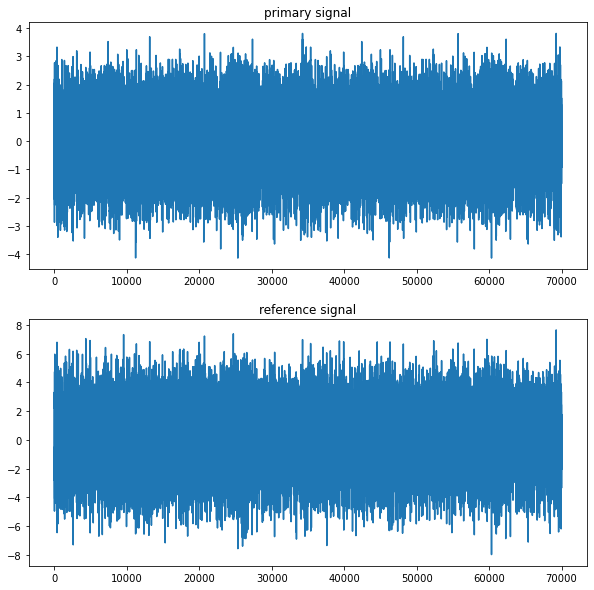

In [111]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.io.wavfile import read
from scipy import signal


"load the data"
data = scio.loadmat('project1.mat')
primary = data['primary']
reference = data['reference']
length = primary.shape[1]



x = np.arange(0,length,1)
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.title("primary signal")
plt.plot(x,primary[0])


plt.subplot(2,1,2)
plt.title("reference signal")
plt.plot(x,reference[0])

plt.show()








Text(0.5, 1.0, 'spectrogram')

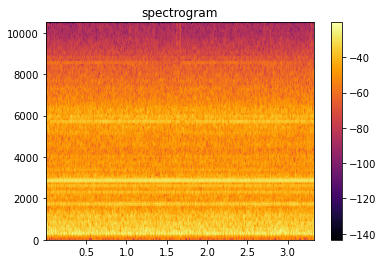

In [112]:
"observe the noise to determine the order number of adaptive filter"

plt.figure()
f, t, Zxx = signal.stft(primary[0,:], fs=21000)
plt.specgram(primary[0,:], Fs=21000,cmap = 'inferno')
plt.colorbar()
plt.title("spectrogram")

In [113]:
"""According to spectogram of noise, we can find that there are 6 dominant frequency in noise, so the order number can be 12 """

'According to spectogram of noise, we can find that there are 3 dominant frequency in noise, so the order number can be 6 '

In [114]:

"setting parameter"
order_number = 12
W = np.zeros([1,order_number])
Epsilon = 0.05
Nu = 0.02
"data preprocessing"

primary_time = np.zeros([length,order_number])

for i in range(length):
    index = i
    for j in range(order_number):
        if index >= 0:
            primary_time[i][j] = primary[0][index]
            index -= 1
        else:
            break


(1, 70000)


Text(0.5, 1.0, 'learning curve')

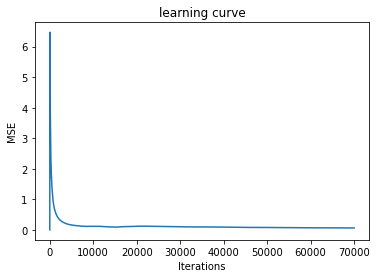

In [115]:
"execute NLMS algorithm"
mse_cur = np.zeros([1,length])
output = np.zeros([1,length])
print(mse_cur.shape)

for iteration in range(length):   #40181
    error = reference[0][iteration] - np.dot(primary_time[iteration], W[0, :].T)
    X = primary_time[iteration]
    Nu_epsilion = Nu / (Epsilon + np.dot(X, X))
    W = W + (Nu_epsilion * (error * X))
    output[0][iteration] = (np.dot(primary_time[iteration], W[0,:]).T)
    mse_cur[0][iteration] = (np.square(output[0][0:iteration] - reference[0][0:iteration]).sum())/(iteration+1)
    
plt.figure()
plt.plot(x,mse_cur[0,:])
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("learning curve")




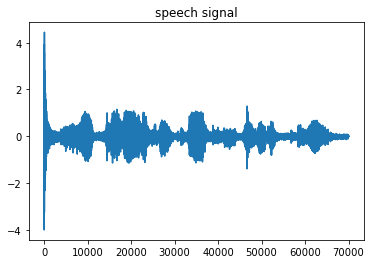

In [116]:
speech = reference[0,:] - output[0,:]


plt.figure()
plt.plot(x,speech)
plt.title("speech signal")

write("speech_signal_NLMS.wav",21000,speech)